In [1]:
from diffusers import FluxPipeline
import matplotlib.pyplot as plt
import torch
import time

In [2]:
# torch.backends.cudnn.benchmark = True

DTYPE = torch.float16

ckpt_id = "/oper/ch/git/FLUX.1-dev/"
pipe = FluxPipeline.from_pretrained(
    ckpt_id,
    torch_dtype=torch.bfloat16,
#     low_cpu_mem_usage=True
)
pipe.enable_sequential_cpu_offload()
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()
pipe.to(DTYPE)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.31.0.dev0",
  "_name_or_path": "/oper/ch/git/FLUX.1-dev/",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
images = pipe(
    'a man ride a white hose',
    num_inference_steps=50,
    max_sequence_length=512,
    guidance_scale=3.5,
    height=1024,
    width=1024,
    generator=torch.Generator(device='cuda').manual_seed(0), # device='cpu' results in different random tensors across different dtypes?
).images

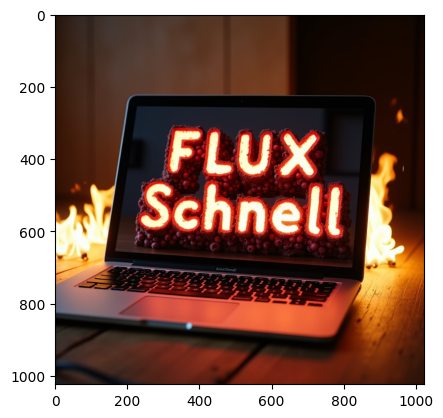

In [6]:
plt.imshow(images[0])
plt.show()

In [6]:
# !pip install optimum-quanto

In [1]:
# import torch
# from diffusers import FluxTransformer2DModel, FluxPipeline
# from transformers import T5EncoderModel, CLIPTextModel
# from optimum.quanto import freeze, qfloat8, quantize

In [2]:
# transformer = FluxTransformer2DModel.from_single_file(
#     'https://huggingface.co/Kijai/flux-fp8/blob/main/flux1-dev-fp8.safetensors',
#     torch_dtype=torch.bfloat16,
# )

In [4]:
# transformer = FluxTransformer2DModel.from_single_file("/oper/ch/git/kijai/flux-fp8/flux-dev-fp8.safetensors", torch_dtype=torch.bfloat16)

In [3]:
# transformer.save_pretrained('/oper/ch/git/flux_transformer/')

In [3]:
# bfl_repo = "/oper/ch/git/FLUX.1-dev"
# dtype = torch.bfloat16
# # transformer = FluxTransformer2DModel.from_single_file("/oper/ch/git/flux-dev-fp8/", torch_dtype=dtype)
# transformer = FluxTransformer2DModel.from_pretrained("/oper/ch/git/flux-dev-fp8/flux-dev-fp8.safetensors",torch_dtype=dtype)

In [4]:
# quantize(transformer, weights=qfloat8)
# freeze(transformer)

In [5]:
# text_encoder_2 = T5EncoderModel.from_pretrained(bfl_repo, subfolder="text_encoder_2", torch_dtype=dtype)
# quantize(text_encoder_2, weights=qfloat8)
# freeze(text_encoder_2)

# pipe = FluxPipeline.from_pretrained(bfl_repo, transformer=None, text_encoder_2=None, torch_dtype=dtype)
# pipe.transformer = transformer
# pipe.text_encoder_2 = text_encoder_2

# pipe.enable_model_cpu_offload()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [8]:
# prompt = "A cat holding a sign that says hello world"
# image = pipe(
#     prompt,
#     guidance_scale=3.5,
# #     output_type="pil",
#     num_inference_steps=20,
#     generator=torch.Generator("cpu").manual_seed(0)
# ).images[0]

# image.save("flux-fp8-dev.png")

In [5]:
# import torch

# from optimum.quanto import freeze, qfloat8, quantize

# from diffusers import FlowMatchEulerDiscreteScheduler, AutoencoderKL
# from diffusers.models.transformers.transformer_flux import FluxTransformer2DModel
# from diffuserFluxTransformer2DModel.from_single_files.pipelines.flux.pipeline_flux import FluxPipeline
# from transformers import CLIPTextModel, CLIPTokenizer,T5EncoderModel, T5TokenizerFast

# dtype = torch.bfloat16

# # schnell is the distilled turbo model. For the CFG distilled model, use:
# # bfl_repo = "black-forest-labs/FLUX.1-dev"
# # revision = "refs/pr/3"
# #
# # The undistilled model that uses CFG ("pro") which can use negative prompts
# # was not released.
# bfl_repo = "black-forest-labs/FLUX.1-schnell"
# revision = "refs/pr/1"

# scheduler = FlowMatchEulerDiscreteScheduler.from_pretrained(bfl_repo, subfolder="scheduler", revision=revision)
# text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14", torch_dtype=dtype)
# tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14", torch_dtype=dtype)
# text_encoder_2 = T5EncoderModel.from_pretrained(bfl_repo, subfolder="text_encoder_2", torch_dtype=dtype, revision=revision)
# tokenizer_2 = T5TokenizerFast.from_pretrained(bfl_repo, subfolder="tokenizer_2", torch_dtype=dtype, revision=revision)
# vae = AutoencoderKL.from_pretrained(bfl_repo, subfolder="vae", torch_dtype=dtype, revision=revision)
# transformer = FluxTransformer2DModel.from_pretrained(bfl_repo, subfolder="transformer", torch_dtype=dtype, revision=revision)

# # Experimental: Try this to load in 4-bit for <16GB cards.
# #
# # from optimum.quanto import qint4
# # quantize(transformer, weights=qint4, exclude=["proj_out", "x_embedder", "norm_out", "context_embedder"])
# # freeze(transformer)
# quantize(transformer, weights=qfloat8)
# freeze(transformer)

# quantize(text_encoder_2, weights=qfloat8)
# freeze(text_encoder_2)

# pipe = FluxPipeline(
#     scheduler=scheduler,
#     text_encoder=text_encoder,
#     tokenizer=tokenizer,
#     text_encoder_2=None,
#     tokenizer_2=tokenizer_2,
#     vae=vae,
#     transformer=None,
# )
# pipe.text_encoder_2 = text_encoder_2
# pipe.transformer = transformer
# pipe.enable_model_cpu_offload()

# generator = torch.Generator().manual_seed(12345)
# image = pipe(
#     prompt='nekomusume cat girl, digital painting', 
#     width=1024,
#     height=1024,
#     num_inference_steps=4, 
#     generator=generator,
#     guidance_scale=3.5,
# ).images[0]
# image.save('test_flux_distilled.png')

In [ ]:
import torch

from diffusers import FluxPipeline, FluxTransformer2DModel


transformer = FluxTransformer2DModel.from_single_file(
    "https://huggingface.co/Kijai/flux-fp8/blob/main/flux1-dev-fp8.safetensors",
    torch_dtype=torch.float16,
)


pipe = FluxPipeline.from_pretrained(
    "/oper/ch/git/FLUX.1-dev",
    transformer=transformer,
    torch_dtype=torch.float16,
)

# pipe.enable_model_cpu_offload()
pipe.enable_sequential_cpu_offload()
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()
generator = torch.Generator(device='cuda').manual_seed(12345)
image = pipe(
    prompt="high quality photo of a dog",
    width=1024,
    height=1024,
    num_inference_steps=20,
    generator=generator,
    guidance_scale=3.5,
).images[0]